In [1]:
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
import numba as nb 
from bse import BSESolver


/home/jiacao/codes/qttools/src/qttools/utils/gpu_utils.py:34: UserWarning: 'cupy' is unavailable, defaulting to 'numpy'. (cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version)
  warn(f"'cupy' is unavailable, defaulting to 'numpy'. ({e})")


# read ref data

In [2]:
datasetname='/usr/scratch2/tortin16/jiacao/BSE_calc/agnr7/python/test/data_len10_ndiag14_nen600_'
indata=np.load(datasetname+'input.npz')
ham=indata['ham']
V=indata['coulomb']
lead_h00=indata['lead_h00']
lead_h10=indata['lead_h10']
lead_coupling=indata['lead_coupling']
GL=indata['G_lesser']
GG=indata['G_greater']
W=indata['W0_r']

outdata=np.load(datasetname+'output.npz')
P_r=outdata['P_r']
nops=outdata['nops']

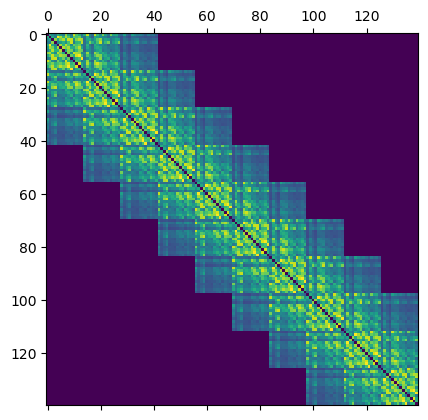

In [3]:
plt.matshow(np.real(W[:,:]))

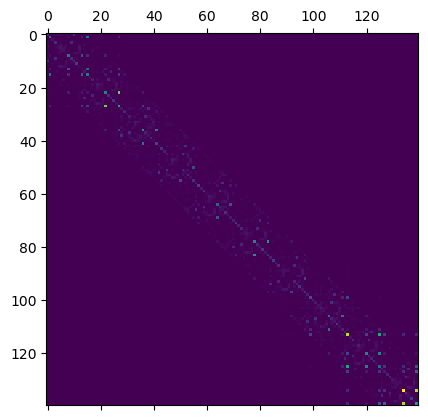

In [4]:
plt.matshow(np.abs(P_r[:,:,4]))

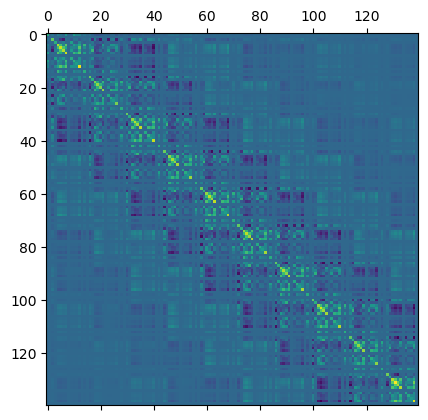

In [5]:
plt.matshow(np.imag(GL[:,:,100]))

In [6]:
nm_dev = int(indata['nm_dev'])
ndiag = int(indata['ndiag'])


## BSE part

In [7]:
nm_dev=30
ndiag=5
num_E=10
bse=BSESolver(nm_dev,ndiag)
bse._preprocess()
bse._alloc_twobody_matrix(num_E=num_E)
# bse._calc_noninteracting_twobody(GG,GL)

  total arrow size= 300
  arrow bandwidth= 50
  arrow block size= 50
  arrow number of blocks= 6
  nonzero elements= 0.0174  Million
  nonzero ratio =  15.977961432506888  %


In [8]:
P = bse._solve_interacting_twobody(V,W)